# Tuagas 6 : Keyword extraction

Keyword extraction adalah proses otomatis untuk mengidentifikasi dan mengekstrak kata-kata atau frasa yang paling penting atau relevan dari suatu dokumen teks.

- **Tujuan utama dari keyword extraction** adalah untuk menemukan istilah kunci yang mewakili inti dari suatu teks tanpa harus membaca seluruh dokumen. Ini sangat berguna untuk berbagai tugas seperti pengindeksan, pencarian informasi, dan analisis teks.

- **Cara Kerja Keyword Extraction**
Keyword extraction bekerja dengan mengidentifikasi kata-kata atau frasa yang memiliki peran penting dalam sebuah teks berdasarkan frekuensi kemunculannya, posisinya dalam teks, atau hubungan semantisnya dengan kata-kata lain.

## 1. Import Librery

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## import data

In [8]:
data = pd.read_csv('data_tugas1.csv')
data

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,Terkini Bisnis: Prabowo Tidak Panggil 6 Menter...,Sebanyak enam orang menteri ekonomi di era kep...,15-10-2024 12:10,Bisnis
1,Klasemen Grup C Kualifikasi Piala Dunia 2026 s...,Timnas Indonesia tertahan di posisi kelima kl...,15-10-2024 23:10,Bola
2,"Profil Herindra, Calon Kepala BIN yang Bakal G...",Presiden Jokowi memberhentikan Budi Gunawan se...,15-10-2024 08:10,Nasional
3,Prediksi Arab Saudi vs Bahrain di Kualifikasi ...,Timnas Arab Saudi akan menjamu Bahrain pada la...,15-10-2024 08:10,Bola
4,Mengenal Pakta Integritas yang Akan Diteken Ca...,Dasco menjelaskan pakta integritas itu ditanda...,15-10-2024 16:10,Nasional
5,Fadli Zon dan Giring Ganesha Ditugaskan Prabow...,"Setelah bertemu dengan Prabowo, Giring mengaku...",15-10-2024 16:10,Nasional
6,Daftar Menteri Ekonomi Jokowi yang Tidak Dipan...,Enam menteri ekonomi era Jokowi tidak dipanggi...,15-10-2024 09:10,Bisnis
7,16 Menteri Jokowi Dipanggil Prabowo ke Kertane...,Sederet menteri Jokowi turut dipanggil preside...,15-10-2024 11:10,Nasional
8,Jerman Berjanji untuk Kirim Lebih Banyak Senja...,Jerman bersikeras mereka tidak menghentikan pe...,15-10-2024 13:10,Dunia
9,Begini Tanggapan Dewan Keamanan PBB usai Seran...,Dewan Keamanan PBB memastikan mendukung UNIFIL...,15-10-2024 09:10,Dunia


## 3. Melakukan Pre-Processing Data

In [9]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

In [10]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['Isi Berita'])
data

100%|██████████| 30/30 [00:00<00:00, 908.99it/s]


,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,cleaned_news
0,Terkini Bisnis: Prabowo Tidak Panggil 6 Menter...,Sebanyak enam orang menteri ekonomi di era kep...,15-10-2024 12:10,Bisnis,enam orang menteri ekonomi era kepemimpinan pr...
1,Klasemen Grup C Kualifikasi Piala Dunia 2026 s...,Timnas Indonesia tertahan di posisi kelima kl...,15-10-2024 23:10,Bola,timnas indonesia tertahan posisi klaseme grup ...
2,"Profil Herindra, Calon Kepala BIN yang Bakal G...",Presiden Jokowi memberhentikan Budi Gunawan se...,15-10-2024 08:10,Nasional,presiden jokowi memberhentikan budi gunawan ke...
3,Prediksi Arab Saudi vs Bahrain di Kualifikasi ...,Timnas Arab Saudi akan menjamu Bahrain pada la...,15-10-2024 08:10,Bola,timnas arab saudi menjamu bahrain laga keempat...
4,Mengenal Pakta Integritas yang Akan Diteken Ca...,Dasco menjelaskan pakta integritas itu ditanda...,15-10-2024 16:10,Nasional,dasco pakta integritas ditandatangani calon me...
5,Fadli Zon dan Giring Ganesha Ditugaskan Prabow...,"Setelah bertemu dengan Prabowo, Giring mengaku...",15-10-2024 16:10,Nasional,bertemu prabowo giring mengaku berdiskusi fadl...
6,Daftar Menteri Ekonomi Jokowi yang Tidak Dipan...,Enam menteri ekonomi era Jokowi tidak dipanggi...,15-10-2024 09:10,Bisnis,enam menteri ekonomi era jokowi dipanggil prab...
7,16 Menteri Jokowi Dipanggil Prabowo ke Kertane...,Sederet menteri Jokowi turut dipanggil preside...,15-10-2024 11:10,Nasional,sederet menteri jokowi dipanggil presiden terp...
8,Jerman Berjanji untuk Kirim Lebih Banyak Senja...,Jerman bersikeras mereka tidak menghentikan pe...,15-10-2024 13:10,Dunia,jerman bersikeras menghentikan penjualan senja...
9,Begini Tanggapan Dewan Keamanan PBB usai Seran...,Dewan Keamanan PBB memastikan mendukung UNIFIL...,15-10-2024 09:10,Dunia,dewan keamanan pbb mendukung unifil operasi st...


- Membersihkan teks menggunakan clean_text.
- Memecah teks menjadi token (kata-kata) dengan word_tokenize.
- Menghapus stopwords menggunakan clean_stopword.
- Hasil akhirnya adalah teks bersih yang dikembalikan dalam bentuk dictionary, - lalu ditambahkan sebagai kolom cleaned_news pada dataframe data.

## 4. melakukan pemisahan tiap kalimat

In [11]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

1. kalimat
- nltk.sent_tokenize(data['cleaned_news'][4]) memecah teks berita ke-4 yang sudah dibersihkan (cleaned_news[4]) menjadi kalimat-kalimat menggunakan fungsi sent_tokenize dari nltk.
- [sentence.replace('.', '') for sentence in kalimat] menghapus tanda titik dari setiap kalimat.

2. kata
- nltk.word_tokenize(data['cleaned_news'][4]) memecah teks berita ke-4 menjadi token (kata-kata) menggunakan word_tokenize.


- list(set(k for k in kata if k != '.')) menghapus token tanda titik dan membuat daftar unik dari kata-kata (tanpa duplikasi) dalam bentuk set yang kemudian dikonversi menjadi list.

In [12]:
kalimat

['dasco pakta integritas ditandatangani calon menteri membantu kerja kabinet prabowo']

In [13]:
kata

['kabinet',
 'integritas',
 'pakta',
 'membantu',
 'dasco',
 'ditandatangani',
 'prabowo',
 'menteri',
 'kerja',
 'calon']

## 5. membuat vektor frekuensi kata dari teks

In [14]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)

	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)

		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

- Inisialisasi DataFrame dengan ukuran sesuai jumlah data, berisi kolom untuk setiap kata unik (kata), dan diinisialisasi dengan nilai 0.
- Melakukan iterasi untuk setiap kalimat (sent) di dalam data.
- Mengubah kalimat menjadi token kata-kata menggunakan word_tokenize.
- menghitung Frekuensi Kata Untuk setiap kata dalam kalimat, jika kata tersebut ada dalam daftar kata, frekuensinya ditambahkan 1 di DataFrame.


## 6. menemukan tiga kata yang paling sering muncul

In [15]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,kabinet,integritas,pakta,membantu,dasco,ditandatangani,prabowo,menteri,kerja,calon
0,1,1,1,1,1,1,1,1,1,1


In [16]:
sorted_kata = df_vektor_kata.sum().sort_values(ascending=False)[:3]
print(", ".join(sorted_kata.index))

kabinet, integritas, pakta



   - `df_vektor_kata.sum()` menghitung total frekuensi setiap kata di seluruh kalimat.

   - `sort_values(ascending=False)` mengurutkan kata berdasarkan total frekuensi dari yang paling sering muncul (descending order).



## 7. membuat matriks ko-occurrence

In [17]:
def create_cooccurrence_matrix(data):
	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

	for sent in data:
		kata_kalimat = word_tokenize(sent)
		for i in range(len(kata_kalimat)-1):
			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1

	return vektor_kata

cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
cooccurrence_matrix

,kabinet,integritas,pakta,membantu,dasco,ditandatangani,prabowo,menteri,kerja,calon
kabinet,0,0,0,0,0,0,1,0,1,0
integritas,0,0,1,0,0,1,0,0,0,0
pakta,0,1,0,0,1,0,0,0,0,0
membantu,0,0,0,0,0,0,0,1,1,0
dasco,0,0,1,0,0,0,0,0,0,0
ditandatangani,0,1,0,0,0,0,0,0,0,1
prabowo,1,0,0,0,0,0,0,0,0,0
menteri,0,0,0,1,0,0,0,0,0,1
kerja,1,0,0,1,0,0,0,0,0,0
calon,0,0,0,0,0,1,0,1,0,0



   - `vektor_kata = pd.DataFrame(0, index=kata, columns=kata)` membuat DataFrame berukuran matriks dengan baris dan kolom yang berisi kata-kata unik dari daftar `kata`, diisi dengan nilai 0.

   - Melakukan iterasi untuk setiap kalimat (`sent`) dalam `data`.

   - Dalam loop nested, untuk setiap kata dalam kalimat, menghitung kemunculan kata berurutan (ko-occurrence) dengan cara:
     - `vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1` menambahkan 1 pada sel yang sesuai untuk pasangan kata yang muncul berurutan.
     - `vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1` juga menambahkan 1 pada sel yang sesuai untuk urutan terbalik, untuk memastikan bahwa ko-occurrence bersifat simetris.


In [18]:
cossim = cosine_similarity(cooccurrence_matrix)

## 8. Menampilkan hasil graph

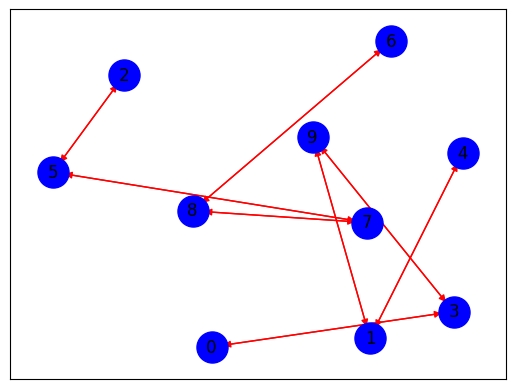

In [19]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## 9. Menghitung PageRank


In [20]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 1: 0.1230
Node 3: 0.1230
Node 5: 0.1230
Node 8: 0.1230
Node 7: 0.1195
Node 9: 0.1195
Node 0: 0.0673
Node 2: 0.0673
Node 4: 0.0673
Node 6: 0.0673


## 10. Menampilkan Tiga Node Teratas berdasarkan PageRank

In [21]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 1: Page Rank = 0.1230
Kalimat: integritas
Node 3: Page Rank = 0.1230
Kalimat: membantu
Node 5: Page Rank = 0.1230
Kalimat: ditandatangani
